## Zindi Africa competition , UmojaHack Africa -- Predicting fires in the DRC
### ranked 11 out of 156

Each year, thousands of fires blaze across the African continent. Some are natural occurrences, part of a ‘fire cycle’ that can actually benefit some dryland ecosystems. Many are started intentionally, used to clear land or to prepare fields for planting. And some are wildfires, which can rage over large areas and cause huge amounts of damage. Whatever the cause, fires pour vast amounts of CO2 into the atmosphere, along with smoke that degrades air quality for those living downwind.

Figuring out the dynamics that influence where and when these fires will occur can help us to better understand their effects. And predicting how these dynamics will play out in the future, under different climatic conditions, could prove extremely useful. For this challenge, the goal is to do exactly that. 

## Library import
-----------------------------------------------------------------------

In [1]:
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

## Loading data

Data source : https://zindi.africa/hackathons/umojahack-3-hotspots/data

In [2]:
train_data = pd.read_csv('train.csv', parse_dates=['date'])
train_data.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975


In [3]:
test_data = pd.read_csv('test.csv', parse_dates=['date'])
test_data.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.926180,-953.401012,1360.571291,...,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457
1,1_2014-01-01,1,2014-01-01,25.669,5.293,0,154.836847,1193.866315,-961.703043,1348.688788,...,0.0,0.494624,0.0,0.505068,0.0,0.000307,0.0,0.0,4.697883,0.000129
2,2_2014-01-01,2,2014-01-01,25.443,5.074,0,127.790933,1223.640222,-962.435857,1351.521823,...,0.0,0.288343,0.0,0.711657,0.0,0.000000,0.0,0.0,2.488614,0.000398
3,3_2014-01-01,3,2014-01-01,25.665,5.070,0,136.924571,1201.258784,-961.326298,1338.120278,...,0.0,0.492103,0.0,0.507897,0.0,0.000000,0.0,0.0,2.439959,0.000158
4,4_2014-01-01,4,2014-01-01,25.886,5.067,0,144.278146,1197.831547,-959.248284,1342.118844,...,0.0,0.333855,0.0,0.666145,0.0,0.000000,0.0,0.0,2.546723,0.000153


### Data cleaning and visualization

In [2]:
# Data types

In [4]:
train_data.dtypes

ID                            object
area                           int64
date                  datetime64[ns]
lat                          float64
lon                          float64
burn_area                    float64
climate_aet                  float64
climate_def                  float64
climate_pdsi                 float64
climate_pet                  float64
climate_pr                   float64
climate_ro                   float64
climate_soil                 float64
climate_srad                 float64
climate_swe                  float64
climate_tmmn                 float64
climate_tmmx                 float64
climate_vap                  float64
climate_vpd                  float64
climate_vs                   float64
elevation                    float64
landcover_0                  float64
landcover_1                  float64
landcover_2                  float64
landcover_3                  float64
landcover_4                  float64
landcover_5                  float64
l

In [3]:
# counting data in train et test set

In [5]:
train_data['burn_area'].value_counts()
test_data['burn_area'].value_counts()

0    137556
Name: burn_area, dtype: int64

In [4]:
# Data description  with correlation matrix 

In [6]:
train_data.describe()
test_data.describe()

,area,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
count,137556.000000,137556.000000,137556.000000,137556.0,137556.000000,137556.000000,137556.000000,137556.000000,137556.000000,137556.000000,...,137556.000000,137556.000000,1.375560e+05,137556.000000,137556.000000,137556.000000,137556.000000,137556.000000,133272.000000,137556.000000
mean,1910.000000,23.743978,-2.859994,0.0,864.402831,260.259443,-515.509934,1124.662595,110.082514,24.097503,...,0.000046,0.767847,2.927091e-07,0.189053,0.000300,0.029133,0.000038,0.001201,35.321161,0.171752
std,1103.031661,3.892359,4.397933,0.0,307.704470,400.966028,483.996616,169.401335,74.112202,40.382936,...,0.000731,0.328336,1.031334e-05,0.314645,0.004824,0.087055,0.000552,0.009484,192.331234,0.120393
min,0.000000,12.416000,-13.394000,0.0,16.445837,0.000000,-1679.813736,563.465222,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,955.000000,20.741000,-6.146000,0.0,726.854412,0.000000,-906.618057,1009.217701,48.235036,2.265291,...,0.000000,0.593401,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,9.775668,0.077209
50%,1910.000000,24.107000,-2.945000,0.0,971.481037,5.584749,-522.843698,1099.403502,115.503642,6.000000,...,0.000000,0.969502,0.000000e+00,0.000000,0.000000,0.000922,0.000000,0.000000,17.316966,0.165985
75%,2865.000000,26.956000,0.857000,0.0,1077.329737,419.024190,-237.316150,1216.970856,158.824573,28.320487,...,0.000000,1.000000,0.000000e+00,0.306922,0.000000,0.015084,0.000000,0.000000,32.673591,0.249339
max,3820.000000,31.096000,5.296000,0.0,1548.181424,2007.769204,1568.611504,2240.864900,597.041132,454.049353,...,0.042343,1.000000,6.147341e-04,1.000000,0.193573,0.991295,0.024590,0.486538,9514.004270,1.253528


In [5]:
# Missing values in train and test set

In [7]:
train_data.isna().sum()
test_data.isna().sum()

ID                       0
area                     0
date                     0
lat                      0
lon                      0
burn_area                0
climate_aet              0
climate_def              0
climate_pdsi             0
climate_pet              0
climate_pr               0
climate_ro               0
climate_soil             0
climate_srad             0
climate_swe              0
climate_tmmn             0
climate_tmmx             0
climate_vap              0
climate_vpd              0
climate_vs               0
elevation                0
landcover_0              0
landcover_1              0
landcover_2              0
landcover_3              0
landcover_4              0
landcover_5              0
landcover_6              0
landcover_7              0
landcover_8              0
population_density    4284
precipitation            0
dtype: int64

In [ ]:
# Data shape

In [8]:
train_data.shape
test_data.shape

(137556, 32)

We notice in this plot a good number of the variables are very weakly correlated or even null correlation. This implies that these variables cannot contribute to build the model. We select the useful variables while ignoring those that we find less important. Here we have : 

'climate_aet', 'climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil', 'climate_srad','climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vs', 'climate_vs', 'climate_aet', 'climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil', 'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vpd', 'climate_vs', 'climate_vs'.

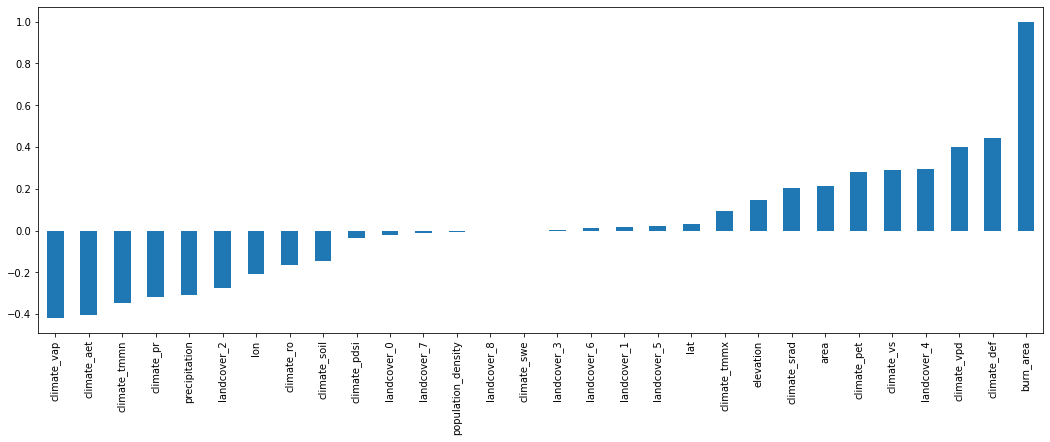

In [9]:
train_data.corr()['burn_area'].sort_values().plot(kind='bar', figsize=(18, 6))


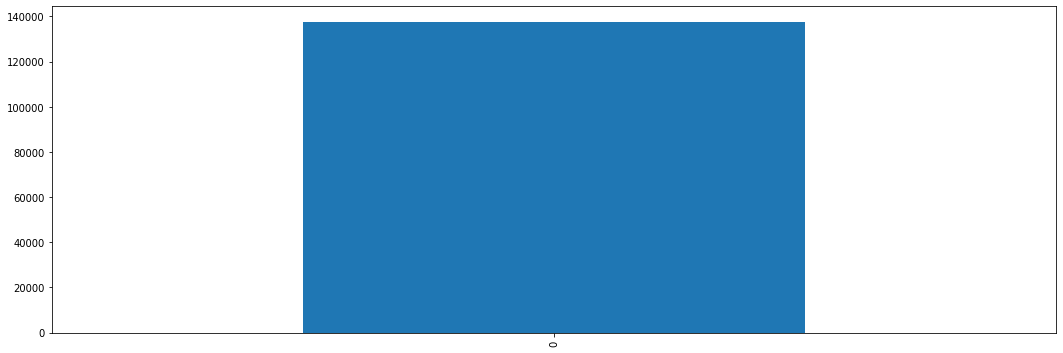

In [10]:
test_data['burn_area'].value_counts().plot(kind='bar', figsize=(18, 6))

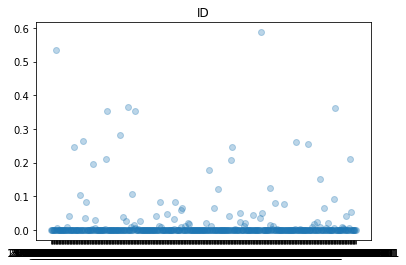

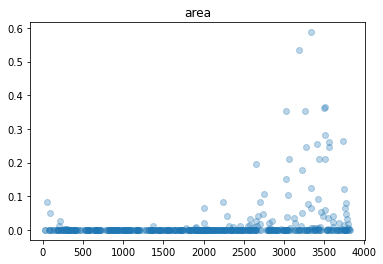

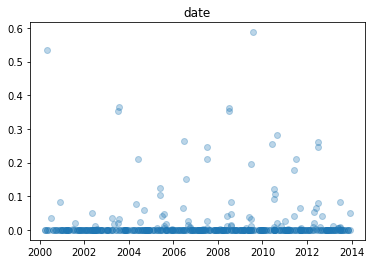

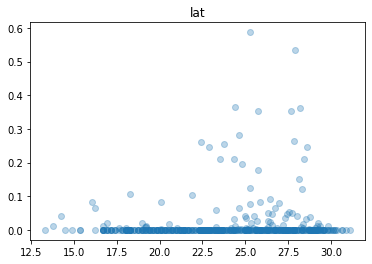

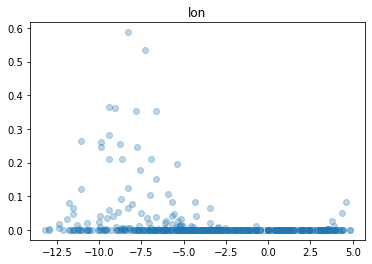

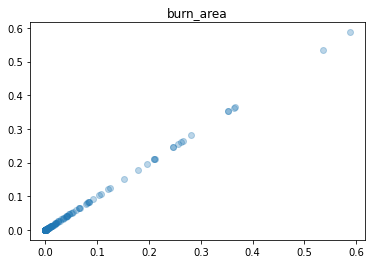

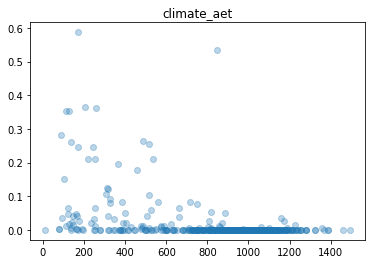

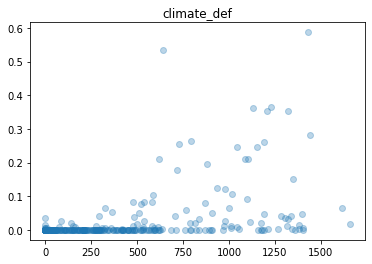

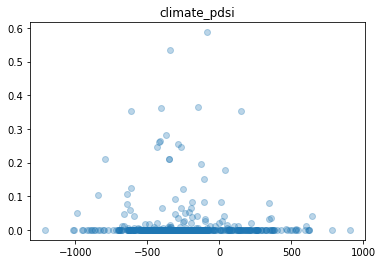

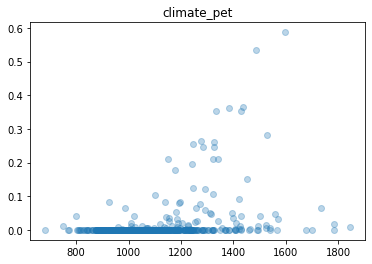

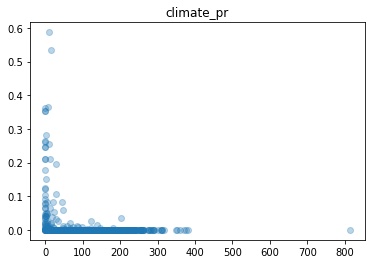

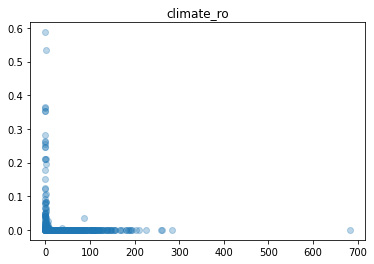

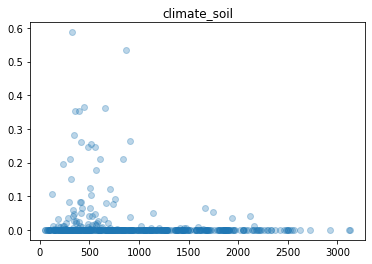

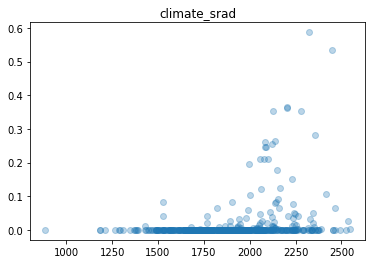

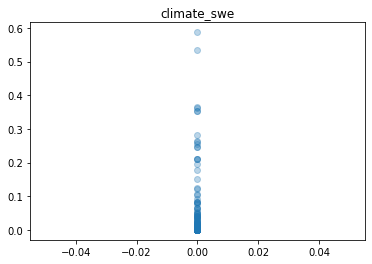

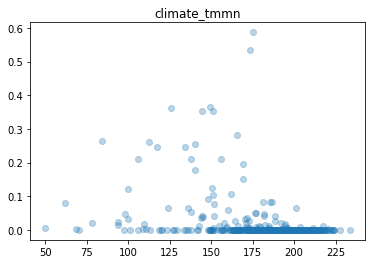

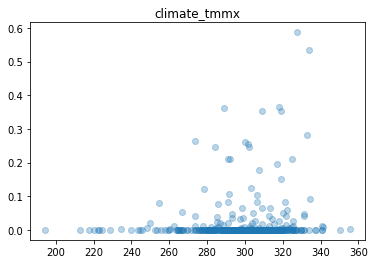

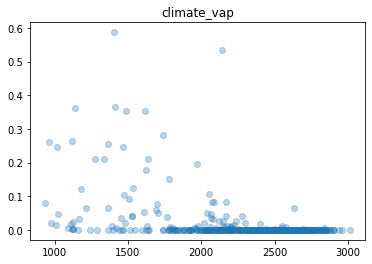

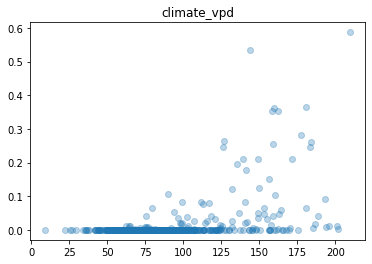

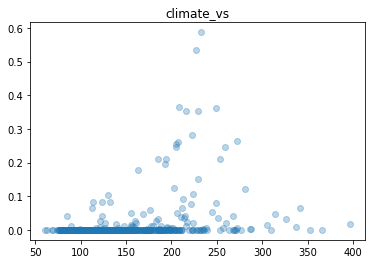

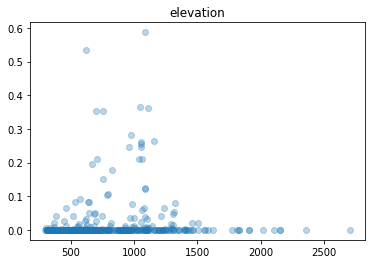

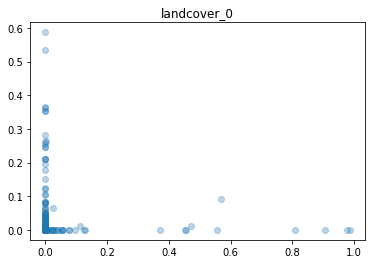

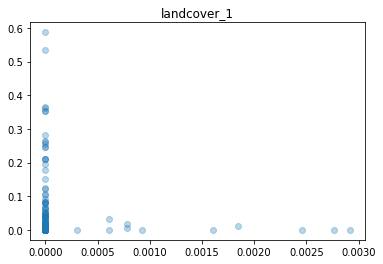

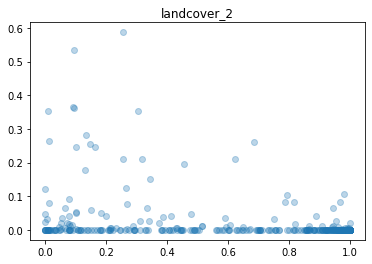

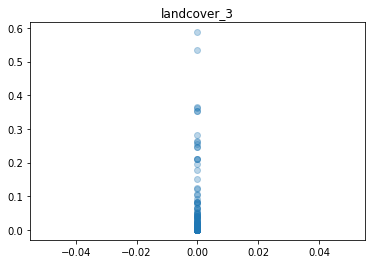

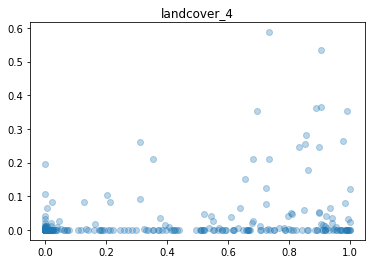

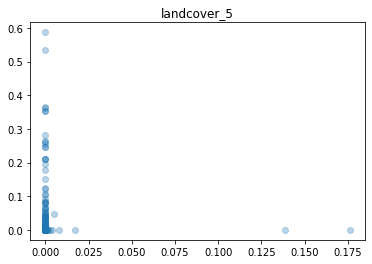

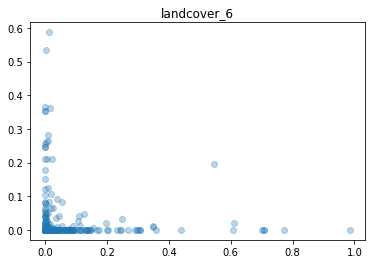

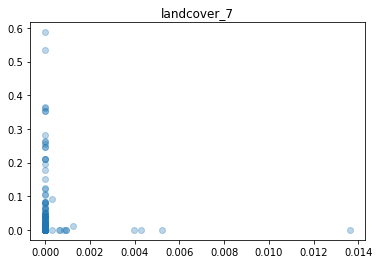

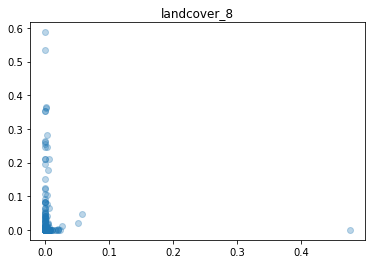

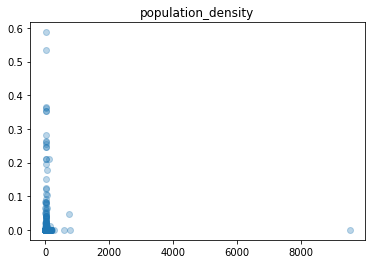

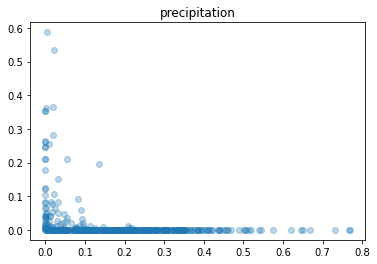

In [11]:
# Look at some scatter plots (only plotting for a subset of data to keep things fast)
sample = train_data.sample(500)
for col in sample.columns:
    plt.scatter(sample[col], sample['burn_area'], alpha=0.3)
    plt.title(col)
    plt.show()

In [12]:
train_data=train_data.drop(['landcover_3','landcover_5','landcover_1','landcover_7','climate_swe'],axis=1)
test_data=test_data.drop(['landcover_3','landcover_5','landcover_1','landcover_7','climate_swe'],axis=1)

In [13]:
test_data.columns

Index(['ID', 'area', 'date', 'lat', 'lon', 'burn_area', 'climate_aet',
       'climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr',
       'climate_ro', 'climate_soil', 'climate_srad', 'climate_tmmn',
       'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vs', 'elevation',
       'landcover_0', 'landcover_2', 'landcover_4', 'landcover_6',
       'landcover_8', 'population_density', 'precipitation'],
      dtype='object')

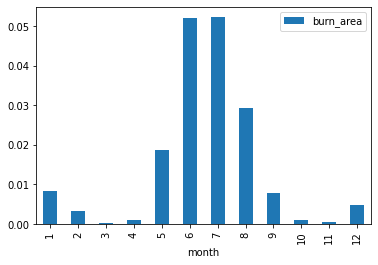

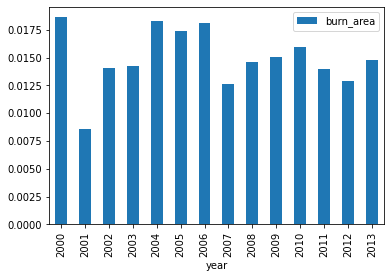

In [14]:
# Date variables
train_data['month'] = train_data.date.dt.month
train_data['year'] = train_data.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train_data.groupby('month').mean().reset_index().plot(y='burn_area', x='month', kind='bar')
train_data.groupby('year').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

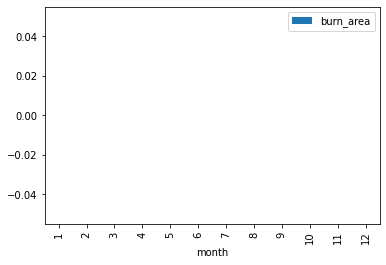

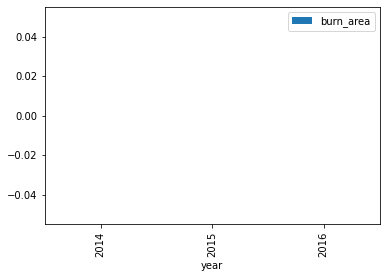

In [15]:
# Date variables
test_data['month'] = test_data.date.dt.month
test_data['year'] = test_data.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
test_data.groupby('month').mean().reset_index().plot(y='burn_area', x='month', kind='bar')
test_data.groupby('year').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

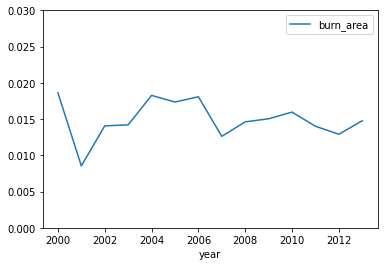

In [16]:
# Plot trend year-on-year
train_data.groupby('year').mean().reset_index().plot(y='burn_area', x='year', ylim=(0, 0.03))

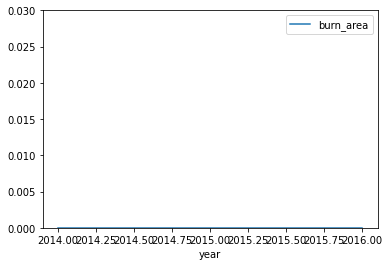

In [17]:
# Plot trend year-on-year
test_data.groupby('year').mean().reset_index().plot(y='burn_area', x='year', ylim=(0, 0.03))

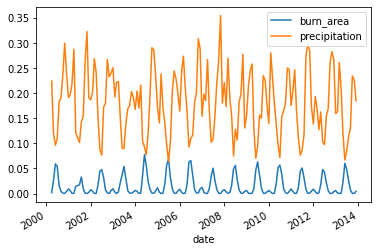

In [18]:
# Let's plot precipitation and burn area on the same plot - note the inverse relationship, and the strong periodic component to both.
ax = train_data.groupby('date').mean().reset_index().plot(y='burn_area', x='date')
train_data.groupby('date').mean().reset_index().plot(y='precipitation', x='date', ax=ax)

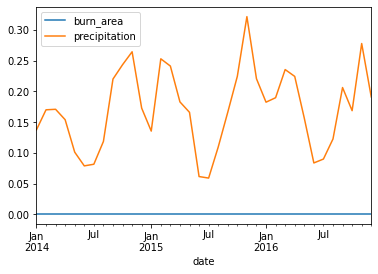

In [19]:
# Let's plot precipitation and burn area on the same plot - note the inverse relationship, and the strong periodic component to both.
ax = test_data.groupby('date').mean().reset_index().plot(y='burn_area', x='date')
test_data.groupby('date').mean().reset_index().plot(y='precipitation', x='date', ax=ax)

In [6]:
# Selecting variables 

In [20]:
variables=['climate_aet','climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil', 'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vs']
train_climate=train_data[variables]
train_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
climate_aet,626644.0,868.907429,287.975104,7.438208,781.852462,954.076835,1056.306879,1666.262670
climate_def,626644.0,223.509282,372.066304,0.000000,0.000000,0.000000,333.155481,2048.897442
climate_pdsi,626644.0,-258.714705,331.469776,-1387.832916,-467.326288,-293.756227,-110.273937,1131.222423
climate_pet,626644.0,1092.416972,170.072823,510.639390,973.879811,1068.663459,1184.196489,2125.220848
climate_pr,626644.0,125.868639,86.558539,0.000000,54.756412,128.187523,184.165079,1111.881507
climate_ro,626644.0,38.823932,55.748898,0.000000,2.998071,8.000000,63.968079,1028.775818
climate_soil,626644.0,939.460119,665.643975,21.507944,385.369020,772.587434,1362.433666,3508.381210
climate_srad,626644.0,1893.144819,269.334818,696.514959,1707.282363,1890.893983,2078.610153,2962.535010
climate_tmmn,626644.0,185.718004,24.548665,38.863690,176.514720,191.908987,201.358784,251.821796
climate_tmmx,626644.0,299.149100,18.169408,148.171487,291.448015,300.363332,309.136060,374.382920


In [21]:
variables=['climate_aet','climate_def', 'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil', 'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap', 'climate_vpd', 'climate_vs']
test_climate=test_data[variables]
test_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
climate_aet,137556.0,864.402831,307.704470,16.445837,726.854412,971.481037,1077.329737,1548.181424
climate_def,137556.0,260.259443,400.966028,0.000000,0.000000,5.584749,419.024190,2007.769204
climate_pdsi,137556.0,-515.509934,483.996616,-1679.813736,-906.618057,-522.843698,-237.316150,1568.611504
climate_pet,137556.0,1124.662595,169.401335,563.465222,1009.217701,1099.403502,1216.970856,2240.864900
climate_pr,137556.0,110.082514,74.112202,0.000000,48.235036,115.503642,158.824573,597.041132
climate_ro,137556.0,24.097503,40.382936,0.000000,2.265291,6.000000,28.320487,454.049353
climate_soil,137556.0,840.856566,658.323370,26.755965,315.422786,633.482234,1228.666265,3508.381210
climate_srad,137556.0,1971.964511,272.010422,923.548263,1795.716505,1966.370264,2154.449190,2833.812726
climate_tmmn,137556.0,186.977804,24.669223,44.144536,178.776036,193.231250,202.445012,245.745176
climate_tmmx,137556.0,298.310330,18.479844,164.490239,291.239725,300.428272,308.196318,373.019018


In [7]:
# We prefer to standardize data and make PCA for dimension reduction 

In [8]:
# Data normalization

In [22]:
train_climate_norme=(train_climate-train_climate.mean())/train_climate.std()

In [23]:
test_climate_norme=(test_climate-test_climate.mean())/test_climate.std()

In [24]:
cormat=train_climate_norme.corr()

In [25]:
cormat1=test_climate_norme.corr()

In [9]:
# Let's retrieve the eigenvalues and eigenvectors

In [26]:
from numpy import linalg as LA
egvalues,egvectors = LA.eig(cormat)
print('eigenvalues\n\n',egvalues)
print('-'*90)
print('eigenvectors\n\n',egvectors)

eigenvalues

 [5.57429362e+00 2.55530872e+00 1.52645357e+00 9.72037562e-01
 7.99409919e-01 6.90336201e-01 3.93083826e-01 2.59371150e-01
 1.19347335e-01 7.54789815e-02 3.23537426e-02 1.34858796e-08
 2.52536610e-03]
------------------------------------------------------------------------------------------
eigenvectors

 [[ 3.06877281e-01 -1.25867620e-01 -2.60007059e-01  5.11464440e-01
  -1.54673377e-01  1.39463384e-01 -3.06743048e-01  1.14001307e-01
   1.76590427e-02 -1.92581590e-01  2.03917669e-01 -5.75620029e-01
  -1.51761532e-03]
 [-3.89547979e-01  4.08483860e-03  3.81241401e-02 -2.95636102e-01
   1.57955495e-01 -8.61949643e-02  2.86874935e-01 -1.34164241e-01
   7.96841101e-02  2.08229141e-01  1.54577123e-01 -7.43705395e-01
  -2.00376921e-03]
 [ 9.47062535e-02  1.85015002e-01 -4.09408356e-01 -4.65160767e-01
  -1.80171107e-01  7.31981238e-01 -1.81014871e-02  1.36596949e-02
   3.14772331e-02  5.46081378e-02 -6.89757804e-03  1.54052059e-07
   4.19275837e-03]
 [-3.32590763e-01 -2.04185914

In [27]:
from numpy import linalg as LA
egvalues1,egvectors1= LA.eig(cormat1)
print('eigenvalues\n\n',egvalues1)
print('-'*90)
print('eigenvectors\n\n',egvectors1)

eigenvalues

 [5.55477268e+00 2.77343137e+00 1.50071109e+00 1.05638664e+00
 6.95584595e-01 5.37752426e-01 3.59460776e-01 2.71138057e-01
 1.29423586e-01 7.95024162e-02 3.93166276e-02 1.31461078e-08
 2.51972672e-03]
------------------------------------------------------------------------------------------
eigenvectors

 [[ 3.26410284e-01 -7.43564357e-02 -1.00909430e-01 -5.07969614e-01
  -3.01980787e-01 -1.50844122e-01 -2.12769614e-01  1.48231688e-01
  -2.67727386e-02  2.67406389e-01 -1.81806786e-01  5.77242431e-01
   6.01923019e-03]
 [-3.95382203e-01 -5.91575465e-03 -4.21733117e-02  2.40369268e-01
   2.25138630e-01  9.28653379e-02  1.96874582e-01 -1.57345541e-01
   1.13267302e-01 -2.43802730e-01 -1.52201998e-01  7.52197929e-01
   4.11389985e-03]
 [ 3.90582624e-02  3.57172211e-01 -3.98437359e-01  2.71217819e-01
  -1.36968071e-01 -7.37138454e-01  1.48750999e-01  1.15871500e-01
   1.89619606e-01 -4.36656911e-02  5.44620847e-02 -4.55513544e-07
  -8.72964375e-03]
 [-3.42954845e-01 -1.49063535

In [ ]:
# We create the function to apply Kaiser's rule to get back the main axes.

In [28]:
def eigenvalues_de_Kaiser(egvalues,egvectors):
   liste=[]
   liste1=[]
   for i in range(len(egvalues)):
       if egvalues[i]>1:
           liste.append(egvalues[i])
           liste1.append(egvectors[i])
   return liste,liste1

In [29]:
def eigenvalues_de_Kaiser(egvalues1,egvectors1):
   liste1=[]
   liste11=[]
   for i in range(len(egvalues1)):
       if egvalues1[i]>1:
           liste1.append(egvalues1[i])
           liste11.append(egvectors1[i])
   return liste1,liste11

In [30]:
egvalues,egvectors=eigenvalues_de_Kaiser(egvalues,egvectors)
#egvectors1[0].shape
v_1,v_2,v_3=egvalues[0:3]
u_1,u_2,u_3=egvectors[0:3]

In [31]:
egvalues1,egvectors1=eigenvalues_de_Kaiser(egvalues1,egvectors1)
#egvectors1[0].shape
v_11,v_22,v_33=egvalues[0:3]
u_11,u_22,u_33=egvectors[0:3]

In [32]:
egvalues,egvectors

([5.574293615681659, 2.5553087227234497, 1.526453566023303],
 [array([ 0.30687728, -0.12586762, -0.26000706,  0.51146444, -0.15467338,
          0.13946338, -0.30674305,  0.11400131,  0.01765904, -0.19258159,
          0.20391767, -0.57562003, -0.00151762]),
  array([-0.38954798,  0.00408484,  0.03812414, -0.2956361 ,  0.15795549,
         -0.08619496,  0.28687494, -0.13416424,  0.07968411,  0.20822914,
          0.15457712, -0.74370539, -0.00200377]),
  array([ 9.47062535e-02,  1.85015002e-01, -4.09408356e-01, -4.65160767e-01,
         -1.80171107e-01,  7.31981238e-01, -1.81014871e-02,  1.36596949e-02,
          3.14772331e-02,  5.46081378e-02, -6.89757804e-03,  1.54052059e-07,
          4.19275837e-03])])

In [33]:
egvalues1,egvectors1

([5.554772675650785,
  2.7734313708917155,
  1.5007110924323948,
  1.0563866370170396],
 [array([ 0.32641028, -0.07435644, -0.10090943, -0.50796961, -0.30198079,
         -0.15084412, -0.21276961,  0.14823169, -0.02677274,  0.26740639,
         -0.18180679,  0.57724243,  0.00601923]),
  array([-0.3953822 , -0.00591575, -0.04217331,  0.24036927,  0.22513863,
          0.09286534,  0.19687458, -0.15734554,  0.1132673 , -0.24380273,
         -0.152202  ,  0.75219793,  0.0041139 ]),
  array([ 3.90582624e-02,  3.57172211e-01, -3.98437359e-01,  2.71217819e-01,
         -1.36968071e-01, -7.37138454e-01,  1.48750999e-01,  1.15871500e-01,
          1.89619606e-01, -4.36656911e-02,  5.44620847e-02, -4.55513544e-07,
         -8.72964375e-03]),
  array([-0.34295484, -0.14906353, -0.28311569, -0.35374617, -0.01562895,
         -0.05418761,  0.0795115 , -0.10317372,  0.21947776, -0.09135445,
         -0.69049225, -0.31778836,  0.02094338])])

In [34]:
import numpy as np

In [35]:
pdv=pd.DataFrame({'axe': np.arange(len(egvalues))+1,'eigenvalues':list(egvalues)})

In [36]:
pdv1=pd.DataFrame({'axe': np.arange(len(egvalues1))+1,'eigenvalues':list(egvalues1)})

In [37]:
pdv

,axe,eigenvalues
0,1,5.574294
1,2,2.555309
2,3,1.526454


In [38]:
pdv1

,axe,eigenvalues
0,1,5.554773
1,2,2.773431
2,3,1.500711
3,4,1.056387


In [39]:
pdv['proportion']=pdv['eigenvalues']/pdv['eigenvalues'].sum()*100
pdv['cumul']=pdv['proportion'].cumsum()
pdv

,axe,eigenvalues,proportion,cumul
0,1,5.574294,57.728473,57.728473
1,2,2.555309,26.463276,84.191749
2,3,1.526454,15.808251,100.000000


In [40]:
pdv1['proportion']=pdv1['eigenvalues']/pdv1['eigenvalues'].sum()*100
pdv1['cumul']=pdv1['proportion'].cumsum()
pdv1

,axe,eigenvalues,proportion,cumul
0,1,5.554773,51.030029,51.030029
1,2,2.773431,25.478682,76.508711
2,3,1.500711,13.786582,90.295293
3,4,1.056387,9.704707,100.000000


Text(0, 0.5, 'eigenvalues')

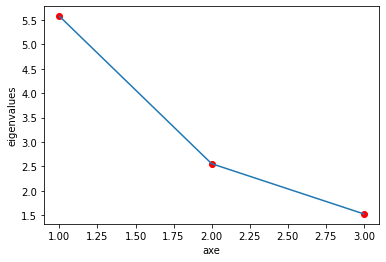

In [41]:
plt.plot(pdv['axe'],pdv['eigenvalues'])
plt.scatter(pdv['axe'],pdv['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')

Text(0, 0.5, 'eigenvalues')

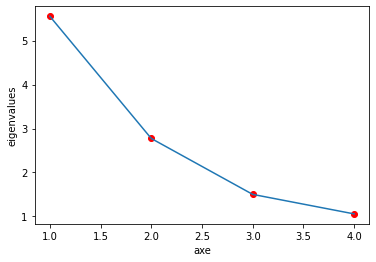

In [42]:
plt.plot(pdv1['axe'],pdv1['eigenvalues'])
plt.scatter(pdv1['axe'],pdv1['eigenvalues'],color='red')
plt.xlabel('axe')
plt.ylabel('eigenvalues')

In [43]:
c_1=np.matmul(train_climate_norme.values,u_1)
c_2=np.matmul(train_climate_norme.values,u_2)

In [44]:
c_11=np.matmul(test_climate_norme.values,u_11)
c_22=np.matmul(test_climate_norme.values,u_22)

In [45]:
# nouveau dataframe from pca
pdseries1=pd.Series(c_1)
pdseries2=pd.Series(c_2)
# pdseries3=pd.Series(c_3)
train_climate_pca=pd.DataFrame([pdseries1,pdseries2])
train_climate_pca=train_climate_pca.T
train_climate_pca.columns=['climate1','climate2']
train_climate_pca

,climate1,climate2
0,0.445714,-1.175902
1,0.387699,-1.036665
2,0.481426,-1.058401
3,0.411337,-0.926814
4,0.345912,-0.854332
...,...,...
626639,-0.935200,0.706958
626640,-0.694881,0.451056
626641,-0.553943,0.281936
626642,-0.332226,0.134173


In [46]:
# New dataframe from PCA
pdseries11=pd.Series(c_11)
pdseries22=pd.Series(c_22)
# pdseries3=pd.Series(c_3)
test_climate_pca=pd.DataFrame([pdseries11,pdseries22])
test_climate_pca=test_climate_pca.T
test_climate_pca.columns=['climate1','climate2']
test_climate_pca

,climate1,climate2
0,-0.094375,-0.026987
1,-0.032352,0.060226
2,-0.023426,0.045781
3,0.044282,0.121229
4,0.036141,0.117377
...,...,...
137551,-1.139284,1.404548
137552,-1.092932,1.317490
137553,-0.992123,1.185130
137554,-0.943537,1.143850


In [47]:
variables.append('ID')

In [48]:
variables

['climate_aet',
 'climate_def',
 'climate_pdsi',
 'climate_pet',
 'climate_pr',
 'climate_ro',
 'climate_soil',
 'climate_srad',
 'climate_tmmn',
 'climate_tmmx',
 'climate_vap',
 'climate_vpd',
 'climate_vs',
 'ID']

In [49]:
train_data=train_data.drop(variables,axis=1)
train_data

,area,date,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year
0,0,2000-04-01,25.447,5.296,0.003688,590.564102,0.0,0.350169,0.649524,0.000307,0.0,2.214262,0.198996,4,2000
1,1,2000-04-01,25.669,5.293,0.000000,611.544277,0.0,0.429049,0.570644,0.000307,0.0,3.833042,0.188071,4,2000
2,2,2000-04-01,25.443,5.074,0.000000,594.188987,0.0,0.238300,0.761700,0.000000,0.0,1.927303,0.211730,4,2000
3,3,2000-04-01,25.665,5.070,0.000000,645.362481,0.0,0.488146,0.511854,0.000000,0.0,1.878281,0.215403,4,2000
4,4,2000-04-01,25.886,5.067,0.000307,660.372381,0.0,0.322243,0.677757,0.000000,0.0,1.968818,0.199975,4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626639,3816,2013-12-01,29.075,-13.214,0.000000,1285.573771,0.0,0.008885,0.988557,0.002558,0.0,14.813819,0.313800,12,2013
626640,3817,2013-12-01,29.298,-13.202,0.000000,1290.924375,0.0,0.006661,0.993339,0.000000,0.0,14.815366,0.320290,12,2013
626641,3818,2013-12-01,29.522,-13.189,0.000000,1393.879019,0.0,0.019980,0.980020,0.000000,0.0,15.981201,0.317855,12,2013
626642,3819,2013-12-01,29.745,-13.176,0.000000,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.282233,12,2013


In [50]:
test_data=test_data.drop(variables,axis=1)
test_data

,area,date,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year
0,0,2014-01-01,25.447,5.296,0,590.564102,0.0,0.430648,0.569045,0.000307,0.0,2.773423,0.000457,1,2014
1,1,2014-01-01,25.669,5.293,0,611.544277,0.0,0.494624,0.505068,0.000307,0.0,4.697883,0.000129,1,2014
2,2,2014-01-01,25.443,5.074,0,594.188987,0.0,0.288343,0.711657,0.000000,0.0,2.488614,0.000398,1,2014
3,3,2014-01-01,25.665,5.070,0,645.362481,0.0,0.492103,0.507897,0.000000,0.0,2.439959,0.000158,1,2014
4,4,2014-01-01,25.886,5.067,0,660.372381,0.0,0.333855,0.666145,0.000000,0.0,2.546723,0.000153,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137551,3816,2016-12-01,29.075,-13.214,0,1285.573771,0.0,0.003381,0.994776,0.001843,0.0,14.813819,0.302496,12,2016
137552,3817,2016-12-01,29.298,-13.202,0,1290.924375,0.0,0.001844,0.998156,0.000000,0.0,14.815366,0.315196,12,2016
137553,3818,2016-12-01,29.522,-13.189,0,1393.879019,0.0,0.007992,0.992008,0.000000,0.0,15.981201,0.312253,12,2016
137554,3819,2016-12-01,29.745,-13.176,0,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.316645,12,2016


In [51]:
train_data.date.value_counts()

2012-05-01    3821
2012-01-01    3821
2005-03-01    3821
2004-07-01    3821
2013-12-01    3821
              ... 
2000-10-01    3821
2004-12-01    3821
2011-07-01    3821
2001-12-01    3821
2009-07-01    3821
Name: date, Length: 164, dtype: int64

In [52]:
train_data.year.value_counts()

2013    45852
2012    45852
2011    45852
2010    45852
2009    45852
2008    45852
2007    45852
2006    45852
2005    45852
2004    45852
2003    45852
2002    45852
2001    42031
2000    34389
Name: year, dtype: int64

In [53]:
date=train_data[['date']]
train_data=train_data.drop('date',axis=1)
train_data

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year
0,0,25.447,5.296,0.003688,590.564102,0.0,0.350169,0.649524,0.000307,0.0,2.214262,0.198996,4,2000
1,1,25.669,5.293,0.000000,611.544277,0.0,0.429049,0.570644,0.000307,0.0,3.833042,0.188071,4,2000
2,2,25.443,5.074,0.000000,594.188987,0.0,0.238300,0.761700,0.000000,0.0,1.927303,0.211730,4,2000
3,3,25.665,5.070,0.000000,645.362481,0.0,0.488146,0.511854,0.000000,0.0,1.878281,0.215403,4,2000
4,4,25.886,5.067,0.000307,660.372381,0.0,0.322243,0.677757,0.000000,0.0,1.968818,0.199975,4,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626639,3816,29.075,-13.214,0.000000,1285.573771,0.0,0.008885,0.988557,0.002558,0.0,14.813819,0.313800,12,2013
626640,3817,29.298,-13.202,0.000000,1290.924375,0.0,0.006661,0.993339,0.000000,0.0,14.815366,0.320290,12,2013
626641,3818,29.522,-13.189,0.000000,1393.879019,0.0,0.019980,0.980020,0.000000,0.0,15.981201,0.317855,12,2013
626642,3819,29.745,-13.176,0.000000,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.282233,12,2013


In [54]:
date1=test_data[['date']]
test_data=test_data.drop('date',axis=1)
test_data

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year
0,0,25.447,5.296,0,590.564102,0.0,0.430648,0.569045,0.000307,0.0,2.773423,0.000457,1,2014
1,1,25.669,5.293,0,611.544277,0.0,0.494624,0.505068,0.000307,0.0,4.697883,0.000129,1,2014
2,2,25.443,5.074,0,594.188987,0.0,0.288343,0.711657,0.000000,0.0,2.488614,0.000398,1,2014
3,3,25.665,5.070,0,645.362481,0.0,0.492103,0.507897,0.000000,0.0,2.439959,0.000158,1,2014
4,4,25.886,5.067,0,660.372381,0.0,0.333855,0.666145,0.000000,0.0,2.546723,0.000153,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137551,3816,29.075,-13.214,0,1285.573771,0.0,0.003381,0.994776,0.001843,0.0,14.813819,0.302496,12,2016
137552,3817,29.298,-13.202,0,1290.924375,0.0,0.001844,0.998156,0.000000,0.0,14.815366,0.315196,12,2016
137553,3818,29.522,-13.189,0,1393.879019,0.0,0.007992,0.992008,0.000000,0.0,15.981201,0.312253,12,2016
137554,3819,29.745,-13.176,0,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.316645,12,2016


In [55]:
train=pd.concat([train_data,train_climate_pca],axis=1)
train

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2
0,0,25.447,5.296,0.003688,590.564102,0.0,0.350169,0.649524,0.000307,0.0,2.214262,0.198996,4,2000,0.445714,-1.175902
1,1,25.669,5.293,0.000000,611.544277,0.0,0.429049,0.570644,0.000307,0.0,3.833042,0.188071,4,2000,0.387699,-1.036665
2,2,25.443,5.074,0.000000,594.188987,0.0,0.238300,0.761700,0.000000,0.0,1.927303,0.211730,4,2000,0.481426,-1.058401
3,3,25.665,5.070,0.000000,645.362481,0.0,0.488146,0.511854,0.000000,0.0,1.878281,0.215403,4,2000,0.411337,-0.926814
4,4,25.886,5.067,0.000307,660.372381,0.0,0.322243,0.677757,0.000000,0.0,1.968818,0.199975,4,2000,0.345912,-0.854332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626639,3816,29.075,-13.214,0.000000,1285.573771,0.0,0.008885,0.988557,0.002558,0.0,14.813819,0.313800,12,2013,-0.935200,0.706958
626640,3817,29.298,-13.202,0.000000,1290.924375,0.0,0.006661,0.993339,0.000000,0.0,14.815366,0.320290,12,2013,-0.694881,0.451056
626641,3818,29.522,-13.189,0.000000,1393.879019,0.0,0.019980,0.980020,0.000000,0.0,15.981201,0.317855,12,2013,-0.553943,0.281936
626642,3819,29.745,-13.176,0.000000,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.282233,12,2013,-0.332226,0.134173


In [56]:
test=pd.concat([test_data,test_climate_pca],axis=1)
test

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2
0,0,25.447,5.296,0,590.564102,0.0,0.430648,0.569045,0.000307,0.0,2.773423,0.000457,1,2014,-0.094375,-0.026987
1,1,25.669,5.293,0,611.544277,0.0,0.494624,0.505068,0.000307,0.0,4.697883,0.000129,1,2014,-0.032352,0.060226
2,2,25.443,5.074,0,594.188987,0.0,0.288343,0.711657,0.000000,0.0,2.488614,0.000398,1,2014,-0.023426,0.045781
3,3,25.665,5.070,0,645.362481,0.0,0.492103,0.507897,0.000000,0.0,2.439959,0.000158,1,2014,0.044282,0.121229
4,4,25.886,5.067,0,660.372381,0.0,0.333855,0.666145,0.000000,0.0,2.546723,0.000153,1,2014,0.036141,0.117377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137551,3816,29.075,-13.214,0,1285.573771,0.0,0.003381,0.994776,0.001843,0.0,14.813819,0.302496,12,2016,-1.139284,1.404548
137552,3817,29.298,-13.202,0,1290.924375,0.0,0.001844,0.998156,0.000000,0.0,14.815366,0.315196,12,2016,-1.092932,1.317490
137553,3818,29.522,-13.189,0,1393.879019,0.0,0.007992,0.992008,0.000000,0.0,15.981201,0.312253,12,2016,-0.992123,1.185130
137554,3819,29.745,-13.176,0,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.316645,12,2016,-0.943537,1.143850


In [57]:
train = train.copy().dropna()

In [58]:
test= test.copy().fillna(0)

In [59]:
train.isna().sum()

area                  0
lat                   0
lon                   0
burn_area             0
elevation             0
landcover_0           0
landcover_2           0
landcover_4           0
landcover_6           0
landcover_8           0
population_density    0
precipitation         0
month                 0
year                  0
climate1              0
climate2              0
dtype: int64

In [60]:
#train_norme=(train-train.mean())/train.std()
train_norme=train

In [61]:
#test_norme=(test-test.mean())/test.std()
test_norme=test

In [62]:
train_norme['date']=date

In [63]:
test_norme['date']=date1

In [64]:
train_norme

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2,date
0,0,25.447,5.296,0.003688,590.564102,0.0,0.350169,0.649524,0.000307,0.0,2.214262,0.198996,4,2000,0.445714,-1.175902,2000-04-01
1,1,25.669,5.293,0.000000,611.544277,0.0,0.429049,0.570644,0.000307,0.0,3.833042,0.188071,4,2000,0.387699,-1.036665,2000-04-01
2,2,25.443,5.074,0.000000,594.188987,0.0,0.238300,0.761700,0.000000,0.0,1.927303,0.211730,4,2000,0.481426,-1.058401,2000-04-01
3,3,25.665,5.070,0.000000,645.362481,0.0,0.488146,0.511854,0.000000,0.0,1.878281,0.215403,4,2000,0.411337,-0.926814,2000-04-01
4,4,25.886,5.067,0.000307,660.372381,0.0,0.322243,0.677757,0.000000,0.0,1.968818,0.199975,4,2000,0.345912,-0.854332,2000-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626639,3816,29.075,-13.214,0.000000,1285.573771,0.0,0.008885,0.988557,0.002558,0.0,14.813819,0.313800,12,2013,-0.935200,0.706958,2013-12-01
626640,3817,29.298,-13.202,0.000000,1290.924375,0.0,0.006661,0.993339,0.000000,0.0,14.815366,0.320290,12,2013,-0.694881,0.451056,2013-12-01
626641,3818,29.522,-13.189,0.000000,1393.879019,0.0,0.019980,0.980020,0.000000,0.0,15.981201,0.317855,12,2013,-0.553943,0.281936,2013-12-01
626642,3819,29.745,-13.176,0.000000,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.282233,12,2013,-0.332226,0.134173,2013-12-01


In [65]:
test_norme

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2,date
0,0,25.447,5.296,0,590.564102,0.0,0.430648,0.569045,0.000307,0.0,2.773423,0.000457,1,2014,-0.094375,-0.026987,2014-01-01
1,1,25.669,5.293,0,611.544277,0.0,0.494624,0.505068,0.000307,0.0,4.697883,0.000129,1,2014,-0.032352,0.060226,2014-01-01
2,2,25.443,5.074,0,594.188987,0.0,0.288343,0.711657,0.000000,0.0,2.488614,0.000398,1,2014,-0.023426,0.045781,2014-01-01
3,3,25.665,5.070,0,645.362481,0.0,0.492103,0.507897,0.000000,0.0,2.439959,0.000158,1,2014,0.044282,0.121229,2014-01-01
4,4,25.886,5.067,0,660.372381,0.0,0.333855,0.666145,0.000000,0.0,2.546723,0.000153,1,2014,0.036141,0.117377,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137551,3816,29.075,-13.214,0,1285.573771,0.0,0.003381,0.994776,0.001843,0.0,14.813819,0.302496,12,2016,-1.139284,1.404548,2016-12-01
137552,3817,29.298,-13.202,0,1290.924375,0.0,0.001844,0.998156,0.000000,0.0,14.815366,0.315196,12,2016,-1.092932,1.317490,2016-12-01
137553,3818,29.522,-13.189,0,1393.879019,0.0,0.007992,0.992008,0.000000,0.0,15.981201,0.312253,12,2016,-0.992123,1.185130,2016-12-01
137554,3819,29.745,-13.176,0,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.316645,12,2016,-0.943537,1.143850,2016-12-01


In [66]:
# train_data = train_data.copy().dropna()
train = train_norme.loc[train_norme.date < '2011-01-01']
valid = train_norme.loc[train_norme.date > '2011-01-01']
print(train.shape, valid.shape)

(473856, 17) (129570, 17)


In [67]:
# train_data = train_data.copy().dropna()
# test = test_norme.loc[test_norme.date < '2011-01-01']
# valid = test_norme.loc[test_norme.date > '2011-01-01']
# print(test.shape, valid.shape)

In [68]:
train

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2,date
0,0,25.447,5.296,0.003688,590.564102,0.0,0.350169,0.649524,0.000307,0.0,2.214262,0.198996,4,2000,0.445714,-1.175902,2000-04-01
1,1,25.669,5.293,0.000000,611.544277,0.0,0.429049,0.570644,0.000307,0.0,3.833042,0.188071,4,2000,0.387699,-1.036665,2000-04-01
2,2,25.443,5.074,0.000000,594.188987,0.0,0.238300,0.761700,0.000000,0.0,1.927303,0.211730,4,2000,0.481426,-1.058401,2000-04-01
3,3,25.665,5.070,0.000000,645.362481,0.0,0.488146,0.511854,0.000000,0.0,1.878281,0.215403,4,2000,0.411337,-0.926814,2000-04-01
4,4,25.886,5.067,0.000307,660.372381,0.0,0.322243,0.677757,0.000000,0.0,1.968818,0.199975,4,2000,0.345912,-0.854332,2000-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489083,3816,29.075,-13.214,0.000000,1285.573771,0.0,0.013673,0.983462,0.002865,0.0,14.813819,0.405946,12,2010,-1.489653,1.455827,2010-12-01
489084,3817,29.298,-13.202,0.000000,1290.924375,0.0,0.013116,0.986884,0.000000,0.0,14.815366,0.371929,12,2010,-1.324606,1.242214,2010-12-01
489085,3818,29.522,-13.189,0.000000,1393.879019,0.0,0.030431,0.969569,0.000000,0.0,15.981201,0.375324,12,2010,-1.229630,1.101142,2010-12-01
489086,3819,29.745,-13.176,0.000000,1386.865940,0.0,0.000182,0.999818,0.000000,0.0,15.206220,0.389620,12,2010,-1.136005,1.016561,2010-12-01


In [69]:
train=train.drop(['date'],axis=1)

In [70]:
test=test_norme.drop(['date'],axis=1)

In [71]:
train

,area,lat,lon,burn_area,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2
0,0,25.447,5.296,0.003688,590.564102,0.0,0.350169,0.649524,0.000307,0.0,2.214262,0.198996,4,2000,0.445714,-1.175902
1,1,25.669,5.293,0.000000,611.544277,0.0,0.429049,0.570644,0.000307,0.0,3.833042,0.188071,4,2000,0.387699,-1.036665
2,2,25.443,5.074,0.000000,594.188987,0.0,0.238300,0.761700,0.000000,0.0,1.927303,0.211730,4,2000,0.481426,-1.058401
3,3,25.665,5.070,0.000000,645.362481,0.0,0.488146,0.511854,0.000000,0.0,1.878281,0.215403,4,2000,0.411337,-0.926814
4,4,25.886,5.067,0.000307,660.372381,0.0,0.322243,0.677757,0.000000,0.0,1.968818,0.199975,4,2000,0.345912,-0.854332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489083,3816,29.075,-13.214,0.000000,1285.573771,0.0,0.013673,0.983462,0.002865,0.0,14.813819,0.405946,12,2010,-1.489653,1.455827
489084,3817,29.298,-13.202,0.000000,1290.924375,0.0,0.013116,0.986884,0.000000,0.0,14.815366,0.371929,12,2010,-1.324606,1.242214
489085,3818,29.522,-13.189,0.000000,1393.879019,0.0,0.030431,0.969569,0.000000,0.0,15.981201,0.375324,12,2010,-1.229630,1.101142
489086,3819,29.745,-13.176,0.000000,1386.865940,0.0,0.000182,0.999818,0.000000,0.0,15.206220,0.389620,12,2010,-1.136005,1.016561


In [72]:
Y=train['burn_area']
X=train.drop(['burn_area'], axis=1)

In [73]:
# Y1=test['burn_area']
X1=test.drop(['burn_area'], axis=1)

In [74]:
import numpy as np
import pandas
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.model_selection import train_test_split
seed = 7
#numpy.random.seed(seed)

In [10]:
#building the model

In [76]:
cart=DecisionTreeRegressor(max_depth=47)
cart.fit(X,Y)
cart.score(X,Y)

0.9999899764283497

In [77]:
predictions = cart.predict(X)

In [11]:
#  We are going to use the metric root_mean_squared_error

In [78]:
rmse= np.sqrt(mean_squared_error(predictions, Y))
rmse

0.00020090542254379328

In [79]:
y_valid=valid[['burn_area']]
valid=valid.drop(['burn_area','date'],axis=1)

In [80]:
valid

,area,lat,lon,elevation,landcover_0,landcover_2,landcover_4,landcover_6,landcover_8,population_density,precipitation,month,year,climate1,climate2
492909,0,25.447,5.296,590.564102,0.0,0.427762,0.571930,0.000307,0.0,2.773423,0.101845,2,2011,-2.627279,-2.538708
492910,1,25.669,5.293,611.544277,0.0,0.486922,0.512771,0.000307,0.0,4.697883,0.102662,2,2011,-2.618484,-2.501225
492911,2,25.443,5.074,594.188987,0.0,0.283547,0.716453,0.000000,0.0,2.488614,0.101497,2,2011,-2.481547,-2.373554
492912,3,25.665,5.070,645.362481,0.0,0.490720,0.509280,0.000000,0.0,2.439959,0.122056,2,2011,-2.456424,-2.322679
492913,4,25.886,5.067,660.372381,0.0,0.342890,0.657110,0.000000,0.0,2.546723,0.117461,2,2011,-2.471861,-2.342265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626639,3816,29.075,-13.214,1285.573771,0.0,0.008885,0.988557,0.002558,0.0,14.813819,0.313800,12,2013,-0.935200,0.706958
626640,3817,29.298,-13.202,1290.924375,0.0,0.006661,0.993339,0.000000,0.0,14.815366,0.320290,12,2013,-0.694881,0.451056
626641,3818,29.522,-13.189,1393.879019,0.0,0.019980,0.980020,0.000000,0.0,15.981201,0.317855,12,2013,-0.553943,0.281936
626642,3819,29.745,-13.176,1386.865940,0.0,0.000000,1.000000,0.000000,0.0,15.206220,0.282233,12,2013,-0.332226,0.134173


In [81]:
y_valid

,burn_area
492909,0.008547
492910,0.043101
492911,0.004058
492912,0.042597
492913,0.010568
...,...
626639,0.000000
626640,0.000000
626641,0.000000
626642,0.000000


In [82]:
cart.score(valid,y_valid)

0.429047237370092

In [83]:
test_pred=cart.predict(X1)

In [86]:
random=RandomForestRegressor(max_depth=20 )
random.fit(X,Y)
random.score(X,Y)

0.9654358969775314

In [87]:
random.score(valid,y_valid)

0.7600240403410472

In [89]:
test_pred=random.predict(X1)

In [90]:
test_pred

array([1.94640667e-01, 1.81302439e-01, 2.27399061e-01, ...,
       5.58900421e-06, 5.58900421e-06, 5.58900421e-06])

In [91]:
ss = pd.read_csv('SampleSubmission.csv')
ss.shape
ss['Prediction'] = test_pred
ss.to_csv('AI_Dream_AIMSSN_submission4.csv', index=False)

In [ ]:
### GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':np.arange(1,100),}

grid=GridSearchCV(RandomForestRegressor(),param_grid,cv=5)
grid.fit(X,Y)
grid.best_params_
grid.best_score_
model=grid.best_estimator_
model.score(valid,y_valid)